# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import plotnine as p9
from plotnine import ggplot, aes, geom_boxplot

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.columns)
print(study_results.columns)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")
# Display the data table for preview
mouse_df


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_df[mouse_df.duplicated()]

mouse_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc[(mouse_df["Mouse ID"] == "g989"), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_df = mouse_df[(mouse_df["Mouse ID"] != "g989"), :]
mouse_df = mouse_df.loc[(mouse_df["Mouse ID"] != "g989"), :]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

def sum_stat(out, df, fnct):
    out = df.groupby(["Drug Regimen"]).fnct()["Tumor Volume (mm3)"]

mouse_mean = mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mouse_median = mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
mouse_var = mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
mouse_sd = mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
mouse_sem = mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_summary = pd.DataFrame([mouse_mean, mouse_median, mouse_var, mouse_sd, mouse_sem]).T
mouse_summary.columns = ["Mean Tumor Volume","Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
mouse_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# using the aggregation method in one line of code
mouse_summary2 = mouse_df.groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

mouse_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

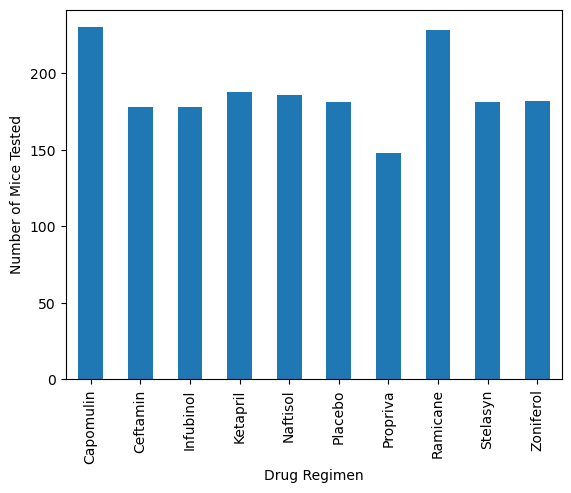

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_lab = "Drug Regimen"
y_lab = "Number of Mice Tested"

mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"].plot(kind = "bar", xlabel = x_lab, ylabel = y_lab)
#plot(kind = "bar")
#plt.xlabel("Drug Regimen")
#plt.ylabel("Number of Mice Tested")
#plt.show()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

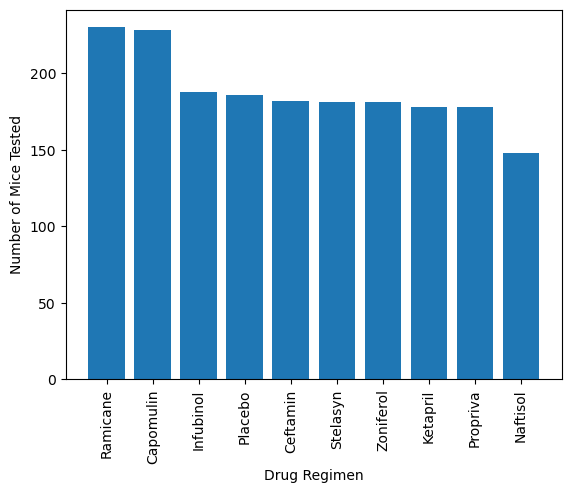

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#plt.bar(x = mouse_df["Drug Regimen"].unique(),y = mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"], xlabel = "Drug Regimen", ylabel = "Number of Mice Tested")

plt.bar(x = mouse_df["Drug Regimen"].unique(),height = sorted(mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"], reverse = True))
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.xticks(rotation = 90)
#maybe add ylim?


<AxesSubplot:ylabel='Mouse ID'>

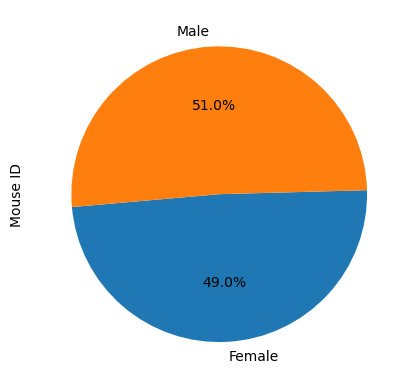

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
start_angle = 185
auto_pct = "%1.1f%%"

mouse_df.groupby(["Sex"]).count()["Mouse ID"].plot(kind = "pie", autopct = auto_pct, startangle = start_angle)

#remove label, remove white background.

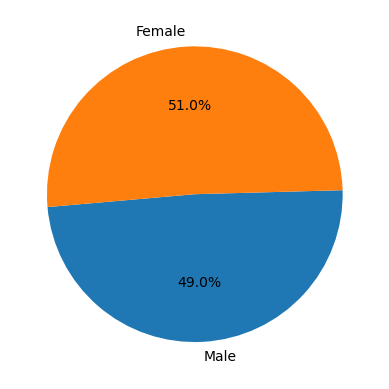

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_df.groupby(["Sex"]).count()["Mouse ID"], labels = mouse_df["Sex"].unique(), autopct = auto_pct, startangle = start_angle)

pies = ["Apple", "Pumpkin", "Chocolate Creme", "Cherry", "Apple Crumb", "Pecan", "Lemon Meringue", "Blueberry", "Key Lime", "Peach"]
pie_votes = [47,37,32,27,25,24,24,21,18,16]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

mouse_df = mouse_df.sort_values(by=['Mouse ID', 'Timepoint'])

  # groupby id and get the last tumor volumne for each group
final_tumor = mouse_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

final_tumor = final_tumor.rename("final_tumor")




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_df = pd.merge(mouse_df, final_tumor, on = "Mouse ID", how = "left")



#calculate the final tumor volume
mouse_df = mouse_df.sort_values(by=['Mouse ID', 'Timepoint'])
tumor_df = mouse_df.groupby('Mouse ID').last()

#calculate descriptives for each drug regimen
tumor_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].describe()


#print(final_tumor)



,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731
Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014
Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817
Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939
Propriva,24.0,56.493884,8.415626,45.000000,49.119739,55.591622,62.689368,72.455421
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869
Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#create function that checks for outliers
def outlier(df, column_to_check):
    #df is a pandas dataframe of interest
    #column to test is a string of the column name of the pandas dataframe put in for df
    #e.g., mouse_df["Tumor Volume (mm3)
    quartiles = df[column_to_check].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr) 
    upper_bound = upperq + (1.5 * iqr)
    df["outlier"] =  ((df[column_to_check] < lower_bound) | (df[column_to_check] > upper_bound))
    return(df)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

    

In [15]:
#create list of drugs
drug_list = mouse_df["Drug Regimen"].unique()

#create new outlier column with placeholder values
tumor_df["outlier"] = -99

#for loop to check for outlier, saving results to dataframe
for drug in drug_list:
    drug_df = tumor_df.loc[(tumor_df["Drug Regimen"] == drug)]
    drug_df = outlier(drug_df, "Tumor Volume (mm3)")
    tumor_df.loc[(tumor_df["Drug Regimen"] == drug), ["outlier"]] = drug_df["outlier"]


/var/folders/bm/zz3zwwtj491ggdvwhnvk_wyr0000gn/T/ipykernel_33203/750694672.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/bm/zz3zwwtj491ggdvwhnvk_wyr0000gn/T/ipykernel_33203/750694672.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/bm/zz3zwwtj491ggdvwhnvk_wyr0000gn/T/ipykernel_33203/750694672.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [36]:
#showing df of potential outliers
tumor_df.loc[(tumor_df["outlier"] == True), :]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,final_tumor,outlier,avg_tumor_vol
Mouse ID,,,,,,,,,,
c326,Infubinol,Female,18,25,5,36.321346,0,36.321346,True,40.660673


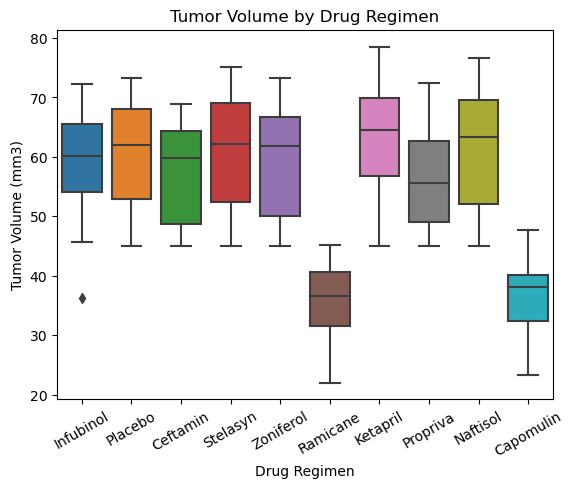

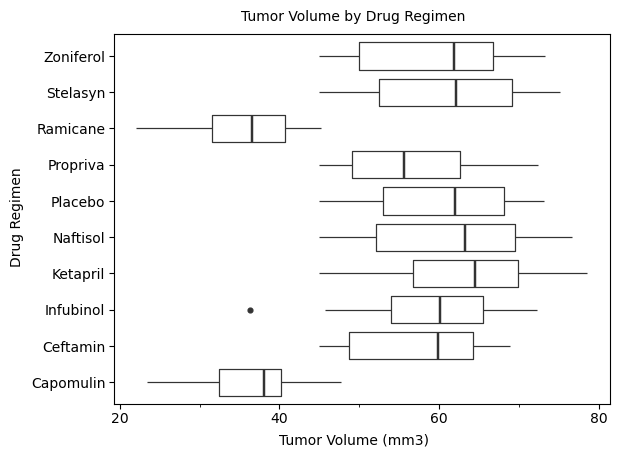

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#using seaborn for the challenge
sns.boxplot(x = "Drug Regimen", y = "Tumor Volume (mm3)", data = tumor_df)
plt.title("Tumor Volume by Drug Regimen")
plt.xticks(rotation = 30)
plt.show()

#using plotnine as it is more comfortable to me :) 
boxplot = ggplot(tumor_df, aes(x = "Drug Regimen", y = "Tumor Volume (mm3)")) + geom_boxplot() + p9.labels.ggtitle("Tumor Volume by Drug Regimen") + p9.theme_matplotlib() + p9.coord_flip()
print(boxplot)
#plt.boxplot(drug_list, )

## Line and Scatter Plots

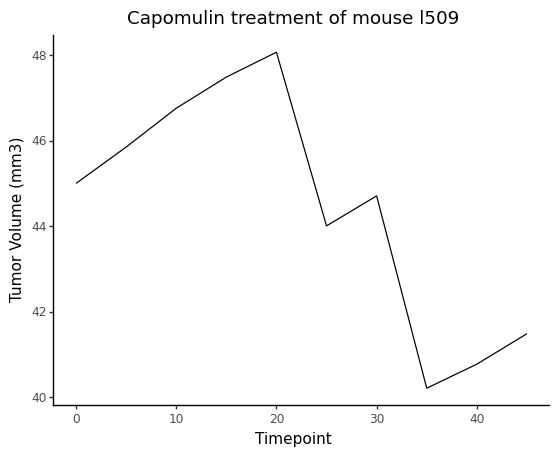

<ggplot: (8762627337768)>

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_line = mouse_df.loc[(mouse_df["Mouse ID"] == "l509"), :]
#print(mouse_line)
p9.ggplot(mouse_line, aes(x = "Timepoint", y = "Tumor Volume (mm3)")) + p9.geom_line() + p9.labels.ggtitle("Capomulin treatment of mouse l509")+ p9.theme_classic()


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor = mouse_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

average_tumor = average_tumor.rename("avg_tumor_vol")
tumor_df = pd.merge(tumor_df, average_tumor, on = "Mouse ID")




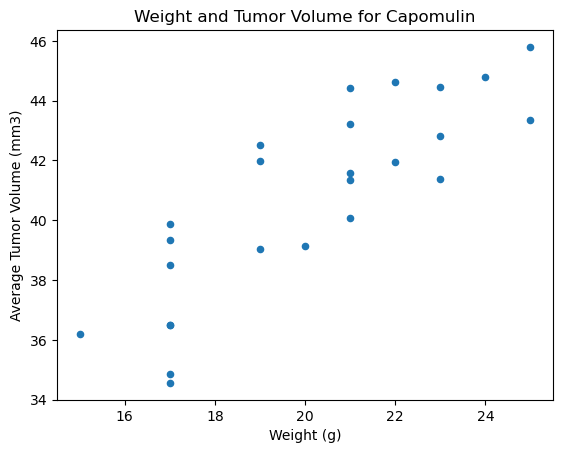

In [45]:
capomulin_df = tumor_df.loc[(tumor_df["Drug Regimen"] == "Capomulin")]
capomulin_df.plot(x = "Weight (g)", y = "avg_tumor_vol", kind = "scatter", ylabel = "Average Tumor Volume (mm3)", title = "Weight and Tumor Volume for Capomulin")
plt.show()

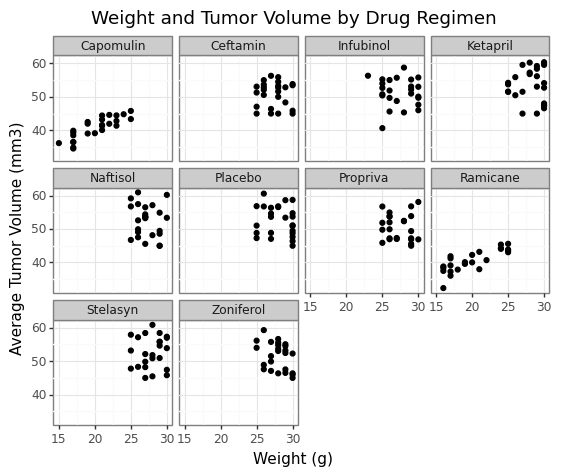

<ggplot: (8762596622852)>

In [48]:
#create scatterplot for all drug regimens
p9.ggplot(tumor_df, aes(x = "Weight (g)", y = "avg_tumor_vol")) + p9.geom_point() + p9.facet_wrap("Drug Regimen") + p9.labels.ggtitle("Weight and Tumor Volume by Drug Regimen") + p9.labels.ylab("Average Tumor Volume (mm3)") + p9.theme_bw()


## Correlation and Regression

The Pearson correlation between mouse weight and the average tumor volume for Infubinol is r = -0.06 p = 0.789


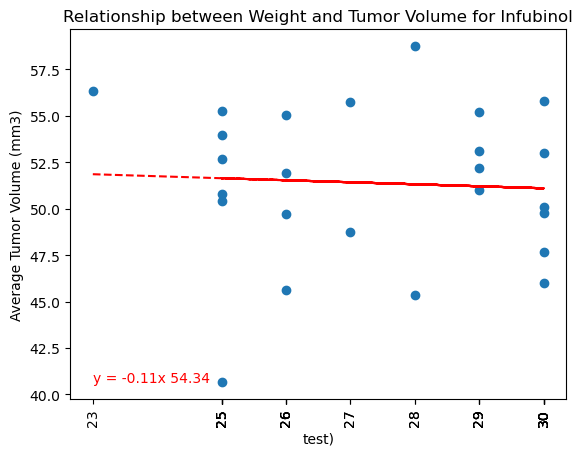

The Pearson correlation between mouse weight and the average tumor volume for Placebo is r = -0.17 p = 0.422


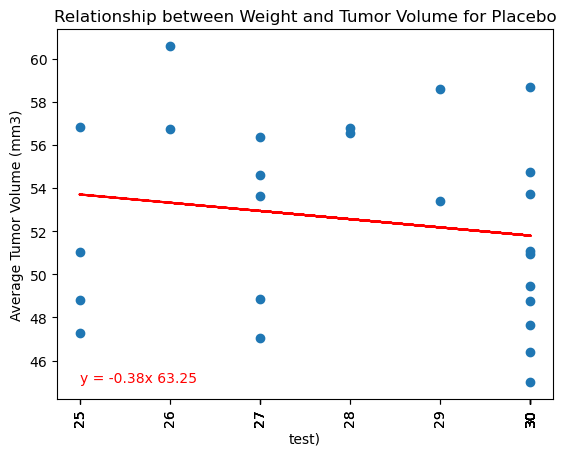

The Pearson correlation between mouse weight and the average tumor volume for Ceftamin is r = -0.04 p = 0.865


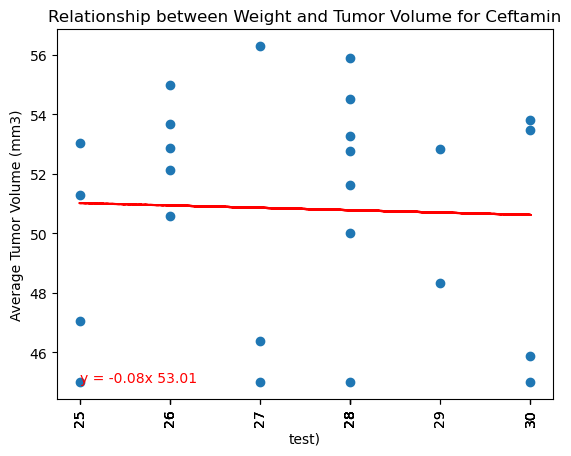

The Pearson correlation between mouse weight and the average tumor volume for Stelasyn is r = 0.08 p = 0.695


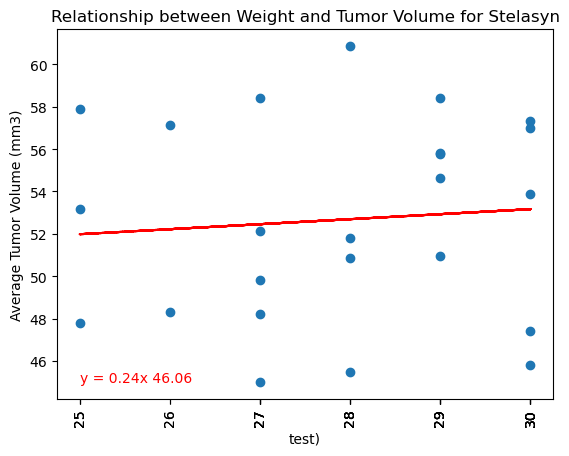

The Pearson correlation between mouse weight and the average tumor volume for Zoniferol is r = -0.36 p = 0.075


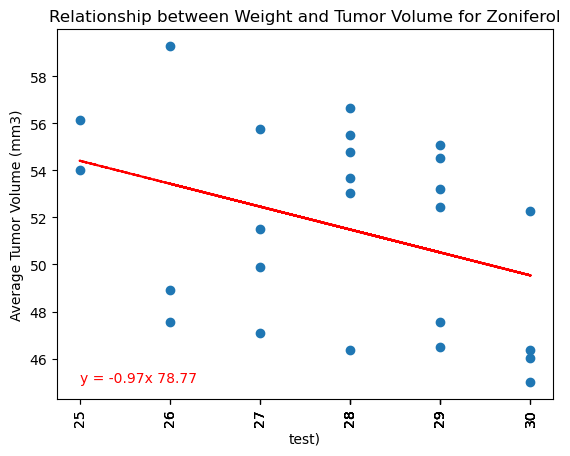

The Pearson correlation between mouse weight and the average tumor volume for Ramicane is r = 0.81 p = 0.0


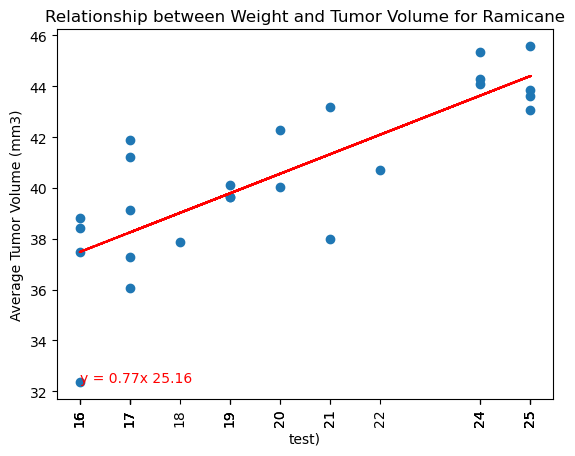

The Pearson correlation between mouse weight and the average tumor volume for Ketapril is r = -0.02 p = 0.925


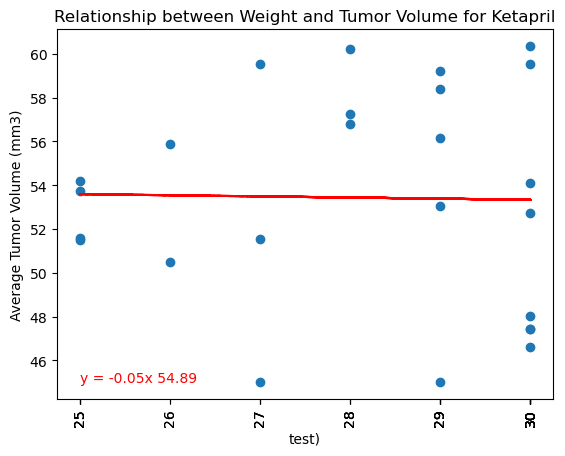

The Pearson correlation between mouse weight and the average tumor volume for Propriva is r = -0.07 p = 0.738


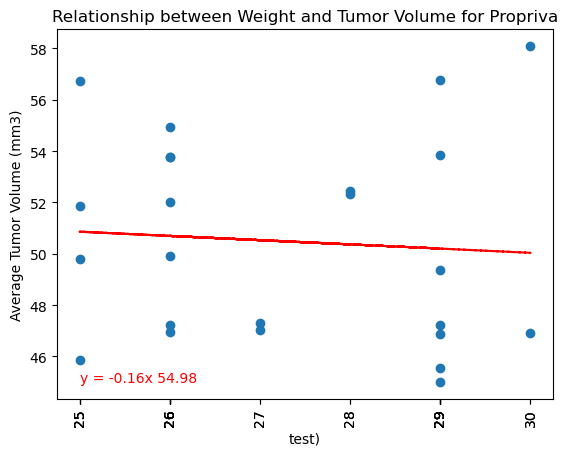

The Pearson correlation between mouse weight and the average tumor volume for Naftisol is r = -0.15 p = 0.481


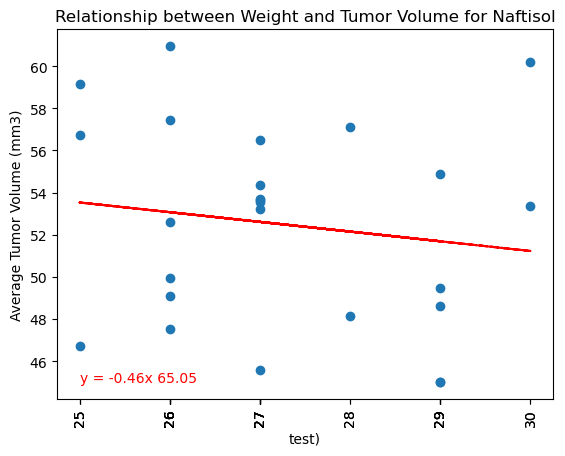

The Pearson correlation between mouse weight and the average tumor volume for Capomulin is r = 0.84 p = 0.0


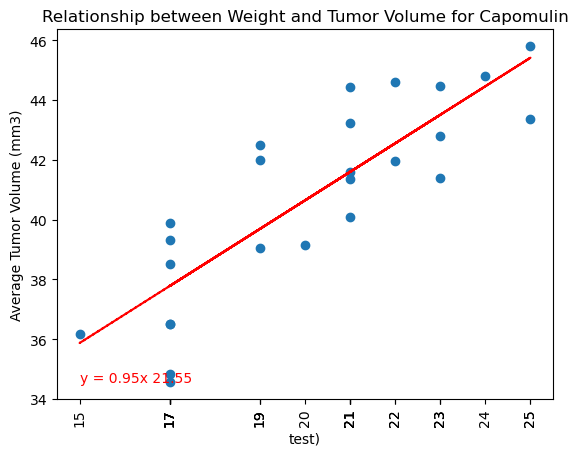

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for all drug regimens (including Capomulin regimen)

for drug in drug_list:
    drug_df = tumor_df.loc[(tumor_df["Drug Regimen"] == drug)]
    x_var = drug_df["Weight (g)"]
    y_var = drug_df["avg_tumor_vol"]
    drug_cor = st.pearsonr(x_var, y_var)
    print(f"The Pearson correlation between mouse weight and the average tumor volume for {drug} is r = {round(drug_cor[0], 2)} p = {round(drug_cor[1], 3)}")
    # Perform a linear regression on year versus petrol-electric cars
    mod_slope, mod_int, mod_r, mod_p, mod_std_err = st.linregress(x = x_var, y = y_var)
    fit = mod_slope * x_var + mod_int
    plt.scatter(x_var,y_var)
    plt.plot(x_var,fit,"--", color = "red")
    plt.xticks(x_var, rotation=90)
    plt.title(f"Relationship between Weight and Tumor Volume for {drug}")
    plt.xlabel('test)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.annotate(f"y = {round(mod_slope, 2)}x {round(mod_int, 2)}", (min(x_var), min(y_var)), color='red')
    plt.show()



    